<div style="border:solid green 2px; padding: 20px">
<b>Привет, Софья!</b>

Меня зовут Александр Пономаренко, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать data science. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<div class="alert alert-info"> <b>Комментарий студента:</b> Привет! Спасибо за ревью, замечание ниже испарвлено
.</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

In [1]:
#%pip install -q -r requirements-ml.txt

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    data = pd.read_csv('insurance.csv')
except FileNotFoundError as e:
    print(e)
    data = pd.read_csv('/datasets/insurance.csv')

In [4]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


В исходных данных представлена информация о клиентах компании. В датафрейме 5 колонок:
- Пол
- Возраст
- Зарплата
- Члены семьи
- Страховые выплаты (количество страховых выплат клиенту за последние 5 лет)

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

Для более удобной работы далее в проекте, а так же для поддержания корректного стилистического написания, переименую колокни: напишу их латиницей, а так же буду использовать "змеиный регистр".

In [5]:
data = data.rename(columns={"Пол": "sex", "Возраст": "age", "Зарплата": "salary", "Члены семьи": "family_members", "Страховые выплаты": "insurance_benefits"})

In [6]:
data.columns

Index(['sex', 'age', 'salary', 'family_members', 'insurance_benefits'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
sex                   5000 non-null int64
age                   5000 non-null float64
salary                5000 non-null float64
family_members        5000 non-null int64
insurance_benefits    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


В датафрейме 5000 строк со значениями, пропусков нет ни в одной из колонок датафрейма. У признакв age и salary некорректный тип данных, изменю тип данных на integer методом astype().

In [8]:
data['age'] = data['age'].astype('int64')
data['salary'] = data['salary'].astype('int64')

In [9]:
data.duplicated().sum()

153

В датафрейме в сумме 153 дубликатов в значениях, однако так как признаки в данных не прдполагают большого разброса уникальных значений, а так же каждой строке не соответствует уникальный id пользователя я могу предположить, что у некоторых клиентов может повторяться информация во всех из признаков.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не изменится, предсказания при умножении признаков на обратимую матрицу останутся неизменными. 

**Обоснование:** 
Для обоснования воспользуюсь следующими свойствами матриц (где свойства 2 и 4 верны всегда, а свойства 1 и 3 верны только для обратимых матриц):
$$
1. AA^{-1} = E
$$
$$
2. (AB)^T = B^TA^T
$$
$$
3. (AB)^{-1} = B^{-1}A^{-1}
$$
$$
4. (AB)C = A(BC)
$$

$
w = (X^T X)^{-1} X^T y\\
w = X^{-1} (X^T)^{-1} X^T y
$

добавим в формулу умножение на P - матрицу, на которую умножаются признаки:

$
w_{i} = ((XP)^T XP)^{-1} (XP)^T\\
w_{i} = (P^T X^T XP)^{-1} P^T X^T y\\
w_{i} = (P^T (X^T XP))^{-1} P^T X^T y\\
w_{i} = (X^T XP)^{-1} (P^T)^{-1} P^T X^T y\\
w_{i} = (X^T XP)^{-1} E X^T y\\
w_{i} = P^{-1} (X^T X)^{-1} X^T y\\
w_{i} = P^{-1} w
$

переходим к формуле предсказания:

$
a = Xw\\
a_{i} = XP w_{i}\\
a_{i} = XP P^{-1} w\\
a_{i} = X E w\\
a_{i} = Xw
a_{i} = a
$

Таким образом, было доказано, что $ a_{i} = a $ , а значит, что при умножении признаков на матрицу P, качество линейной регрессии не изменится, предсказания при умножении признаков на обратимую матрицу останутся неизменными. 

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Обрати внимание, что $ (X^T)^{-1}$ и $ X^{-1}$ - некорректно, так как для неквадратных матриц ($X$ и $X^T$) обратных матриц не существует.

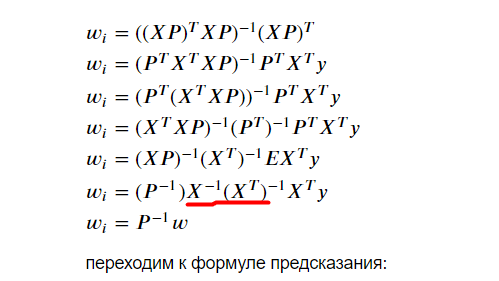
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Дальше можешь воспользоваться свойством, что: $(ABC)^{-1} = C^{-1} B^{-1} A^{-1}$

$(P^T X^T XP)^{-1}$. Пусть $A = P^T$, $B = X^T X$, $C =P$
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправила.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Теперь все верно:)
</div>

## Алгоритм преобразования

**Алгоритм**

Домножение признаков X на обратимую матрицу P (обратимая матрица случайная и имеет размер 4х4) будет являться алгоритмом преобразования. Качество линейной регрессии не поменяется (метрика R2) так как в предыдущем шаге проекта было доказано, что при умножении признаков на обратимую матрицу P не влияет на предсказания модели. Метрики R2 при обучении на признаках и при обучении на признаках, умноженных на случайную обратимую матрицу будут равны.

**Обоснование**

Метрики R2 при обучении на признаках и при обучении на признаках, умноженных на случайную обратимую матрицу будут равны, так как в шаге выше было доказано, что  $ a_{i} = a $ , а значит, что при умножении признаков на матрицу P, качество линейной регрессии не изменится, предсказания при умножении признаков на обратимую матрицу останутся неизменными. 

## Проверка алгоритма

Подготовлю данные для обучения, выделю признаки и целевой признак в отдельные датафреймы.

In [10]:
features = data.drop('insurance_benefits', axis=1)
target = data['insurance_benefits']
display(features.head())
display(target.head())

,sex,age,salary,family_members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


0    0
1    1
2    0
3    0
4    0
Name: insurance_benefits, dtype: int64

In [26]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2 = r2_score(target, predictions)
print(f'Метрика R2: {r2}')

Метрика R2: 0.42494550308169177


Необходимо создать обратимую матрицу P размером 4х4. Квадратные матрицы, для которых можно найти обратные, называются обратимыми. Но не у каждой матрицы есть обратная. Необратимые матрицы встречаются редко. Если сгенерировать случайную матрицу функцией numpy.random.normal(), вероятность получить необратимую матрицу близка к нулю.
Чтобы найти обратную матрицу, вызовите функцию numpy.linalg.inv(). Также она поможет проверить матрицу на обратимость: если матрица необратима, будет обнаружена ошибка. Если определитель матрицы равен нулю, то для нее не существует обратной.

In [15]:
det = 0
P = 0
while det == 0:
    P = np.random.normal(size = (4, 4))
    det = np.linalg.det(P)
P

array([[-1.66232846,  1.92396562, -0.08020785, -1.53930428],
       [ 0.83972736, -0.28961772,  0.80076777, -0.21608304],
       [-1.37382236, -0.77711683, -0.53411651, -1.39607945],
       [ 0.09552517,  0.2770902 , -1.72203384,  2.0216789 ]])

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично, верно проверяешь на обратимость</div>

Далее необходмо умножить признаки на полученную матрицу P и обучить модель снова.

In [27]:
features_new = features.dot(P)
features_new.shape

(5000, 4)

In [28]:
model_new = LinearRegression()
model_new.fit(features_new, target)
predictions = model_new.predict(features_new)
r2_new = r2_score(target, predictions)
print(f'Метрика R2 для признаков, умноженных на обратимую матрицу P {r2_new}')

Метрика R2 для признаков, умноженных на обратимую матрицу P 0.4249455030816369


In [29]:
print(f'Разница метрики R2 для модели, обученной на признаках и на признаках, умноженных на обратимую матрицу: {r2-r2_new}')


Разница метрики R2 для модели, обученной на признаках и на признаках, умноженных на обратимую матрицу: 5.484501741648273e-14


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Супер! Верно:)


Оставлю немного полезного материала:

+  https://ml-handbook.ru/chapters/linear_models/intro
+  https://habr.com/ru/post/595281/
</div>

Разница между двумя метриками ничтожно мала, скорее всего это из-за особенностей округления значений типа float. Так что, можно утверждать, что метрики равны. 

## Вывод

In [ ]:
В ходе проекта было доказано, что при умножении признаков на обратимую матрицу, пердсказания остаются неизменными и метрики равны между собой, качество модели остается прежним. Таким образом, можно утверждать, что такой прием шифрования данных клиен

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Софья, получился хороший проект! 
    
Если есть  если есть какие либо вопросы я с удовольствием на них отвечу:) <br> Исправь, пожалуйста, замечания и жду проект на следующую проверку:) </div>


<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Удачи в следующих проектах!!!
    
    
    
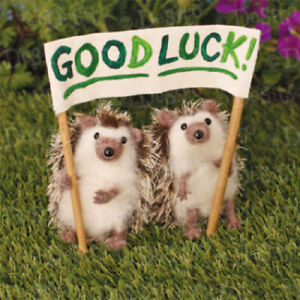
</div>